# Analysis

Fast notebook with some tables and plots to understand better how the algorithm
behaves on different datasets and with different parallel backends.

In [1]:
import pandas as pd

df = pd.read_csv("../results/cluster_iris.csv")
df

,estimators,max_depth,backend,threads,nodes,dataset,train_accuracy,train_f1,test_accuracy,test_f1,train_time,train_predict_time,test_predict_time
0,32,0,ff,1,1,iris,1.0,1.0,0.966667,0.967963,6.268526,0.720606,0.444588
1,32,0,ff,2,1,iris,1.0,1.0,0.966667,0.967963,3.758692,0.773276,0.548225
2,32,0,ff,4,1,iris,1.0,1.0,0.966667,0.967963,2.487906,1.019401,0.964542
3,32,0,ff,8,1,iris,1.0,1.0,0.966667,0.967963,2.310448,2.008172,1.839296
4,32,0,ff,16,1,iris,1.0,1.0,0.966667,0.967963,3.535250,4.869770,4.301242
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,256,0,omp,4,1,iris,1.0,1.0,0.966667,0.967963,12.570220,0.428080,0.107406
144,256,0,omp,8,1,iris,1.0,1.0,0.966667,0.967963,6.843186,0.291825,0.095557
145,256,0,omp,16,1,iris,1.0,1.0,0.966667,0.967963,4.590356,0.220756,0.091594
146,256,0,omp,32,1,iris,1.0,1.0,0.966667,0.967963,5.271624,0.241617,0.123185


## Threading

First let's compare the two multithreaded versions (OpenMP and FastFlow) with
the sequential version.

In [2]:
import matplotlib.pyplot as plt

fields = [
    "estimators",
    "threads",
    "train_time",
    "train_predict_time",
    "test_predict_time",
]

seq = df[df["backend"] == "seq"][fields]
omp = df[df["backend"] == "omp"][fields]
ff = df[df["backend"] == "ff"][fields]

display(seq, omp, ff)

,estimators,threads,train_time,train_predict_time,test_predict_time
36,32,1,5.318034,0.151299,0.034812
73,64,1,11.125140,0.279606,0.062610
110,128,1,21.843120,0.477634,0.109417
147,256,1,42.857240,0.892725,0.201186


,estimators,threads,train_time,train_predict_time,test_predict_time
30,32,1,5.611440,0.192840,0.043679
31,32,2,3.114000,0.118148,0.028757
32,32,4,2.153752,0.094340,0.030775
33,32,8,1.648806,0.086300,0.033725
34,32,16,1.920254,0.078390,0.039991
35,32,32,3.713888,0.526541,0.051169
67,64,1,11.519500,0.328137,0.073940
68,64,2,6.163102,0.186261,0.045498
69,64,4,3.484436,0.150132,0.049563
70,64,8,2.451768,0.117628,0.047540


,estimators,threads,train_time,train_predict_time,test_predict_time
0,32,1,6.268526,0.720606,0.444588
1,32,2,3.758692,0.773276,0.548225
2,32,4,2.487906,1.019401,0.964542
3,32,8,2.310448,2.008172,1.839296
4,32,16,3.535250,4.869770,4.301242
5,32,32,5.447354,8.747920,8.078356
37,64,1,11.727640,0.964722,0.568405
38,64,2,6.493994,0.844422,0.605975
39,64,4,4.073658,1.065417,0.890685
40,64,8,3.114538,2.050338,1.809704


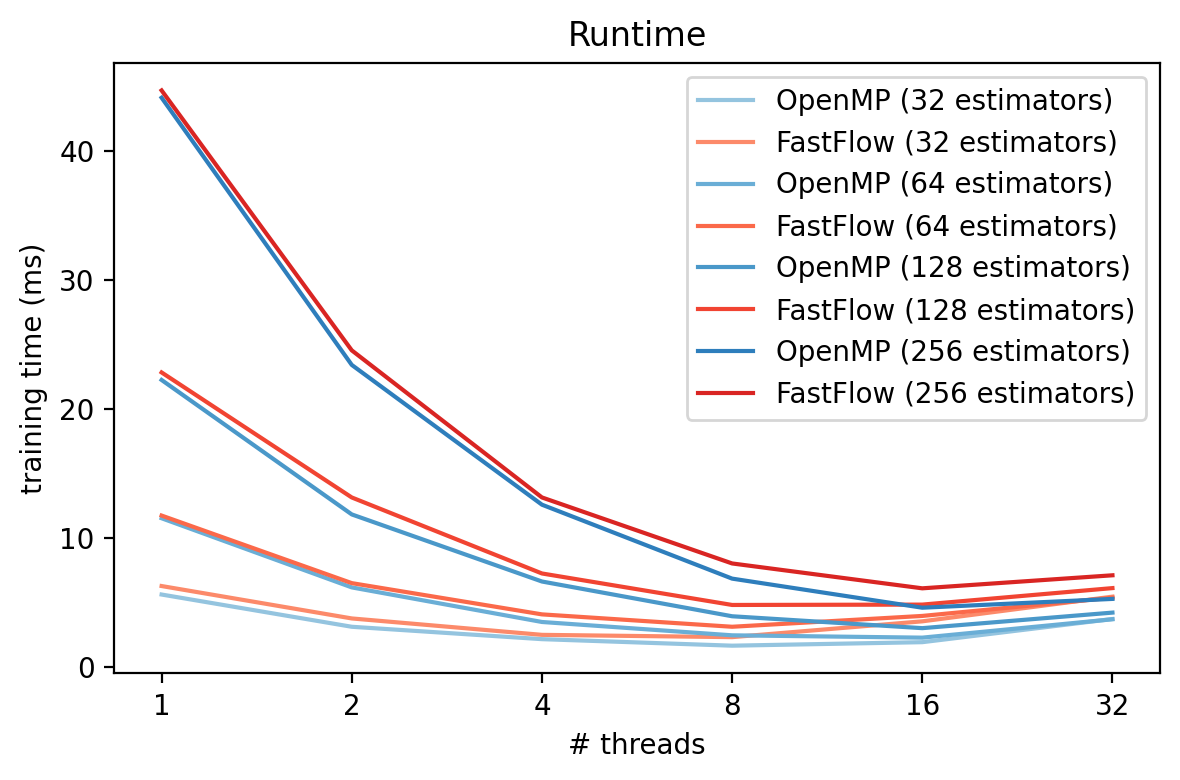

In [12]:
from matplotlib import cm

plt.figure(figsize=(6, 4), dpi=200)
plt.title("Runtime")


estimators = df["estimators"].unique()
cmap_omp = cm.Blues
cmap_ff = cm.Reds

cmin, cmax = 0.4, 0.7


def color_from_cmap(cmap, i, n):
    t = cmin + (cmax - cmin) * (i / (n - 1))
    return cmap(t)


for i, e in enumerate(estimators):
    color_omp = color_from_cmap(cmap_omp, i, len(estimators))
    color_ff = color_from_cmap(cmap_ff, i, len(estimators))

    omp_e = omp[omp["estimators"] == e]
    plt.plot(
        omp_e["threads"],
        omp_e["train_time"],
        color=color_omp,
        label=f"OpenMP ({e} estimators)",
    )

    ff_e = ff[ff["estimators"] == e]
    plt.plot(
        ff_e["threads"],
        ff_e["train_time"],
        color=color_ff,
        label=f"FastFlow ({e} estimators)",
    )

plt.xscale("log", base=2)
ticks = [1, 2, 4, 8, 16, 32]
plt.xticks(ticks, [str(i) for i in ticks])
plt.xlabel(r"# threads")
plt.ylabel("training time (ms)")
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
omp_s = (
    df[df["backend"] == "seq"]["train_time"].to_numpy() / omp["train_time"].to_numpy()
)
ff_s = df[df["backend"] == "seq"]["train_time"].to_numpy() / ff["train_time"].to_numpy()


plt.figure(figsize=(5, 3), dpi=200)
plt.title("Speedup")
plt.plot(omp["threads"], omp_s, label="OpenMP")
plt.plot(ff["threads"], ff_s, label="FastFlow")

plt.xscale("log", base=2)
ticks = [1, 2, 4, 8, 16, 32]
plt.xticks(ticks, [str(i) for i in ticks])
plt.xlabel(r"# threads")
plt.ylabel("speedup")
plt.legend()
plt.tight_layout()
plt.show()

ValueError: operands could not be broadcast together with shapes (4,) (24,) 

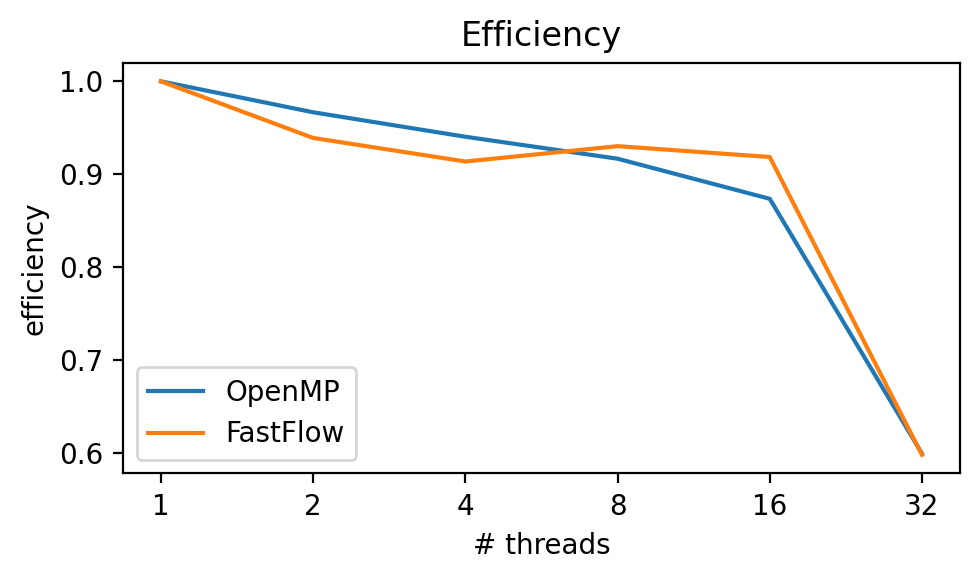

In [ ]:
omp_e = omp_s / omp["threads"].to_numpy()
ff_e = ff_s / ff["threads"].to_numpy()


plt.figure(figsize=(5, 3), dpi=200)
plt.title("Efficiency")
plt.plot(omp["threads"], omp_e, label="OpenMP")
plt.plot(ff["threads"], ff_e, label="FastFlow")

plt.xscale("log", base=2)
ticks = [1, 2, 4, 8, 16, 32]
plt.xticks(ticks, [str(i) for i in ticks])
plt.xlabel(r"# threads")
plt.ylabel("efficiency")
plt.legend()
plt.tight_layout()
plt.show()
